In [13]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from scipy.stats import zscore
import matplotlib.pyplot as plt
import pandas as pd
from google.colab import files
uploaded = files.upload()
df = pd.read_csv('Bank_Personal_Loan_Modelling_train.csv')


Saving Bank_Personal_Loan_Modelling_train.csv to Bank_Personal_Loan_Modelling_train (1).csv


In [14]:
# 1. Разведочный анализ данных

df.drop('ID', axis=1, inplace=True)

c = df.corr()
max_corr = 0
max_corr_x = ''
max_corr_y = ''
for i in range(len(df.columns)):
    for j in range(i+1, len(df.columns)):
        if (i == j): continue

        if (c.loc[df.columns[i]][df.columns[j]] > max_corr):
            max_corr = c.loc[df.columns[i]][df.columns[j]]
            max_corr_x = df.columns[i]
            max_corr_y = df.columns[j]

print(f'1.1 {max_corr_x}, {max_corr_y}')
print(f'1.2 {c.abs().sum().idxmin()}')
df.drop(c.abs().sum().idxmin(), axis=1, inplace=True)

1.1 Age, Experience
1.2 ZIP Code


2.1 23.19625
2.2 23.06166


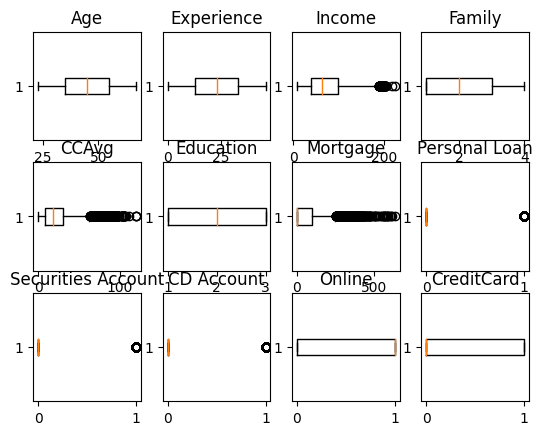

In [15]:
# 2. Предварительная подготовка данных
# Модификация признаков
df['Experience'] -= df['Experience'].min()
print(f'2.1 {df["Experience"].mean()}')
df['CCAvg'] *= 12
print(f'2.2 {df["CCAvg"].mean()}')

# Определение выбросов
fig, axs = plt.subplots(3, 4)

for i, col in enumerate(df.columns):
    ax = axs[i // 4][i % 4]
    ax.boxplot(df[col], vert=False)
    ax.set_title(col)

plt.show()

In [16]:
# Для 2.3 2.4 по графику можно сделать
# 2.3 тупо смотрите какой больше похож
# 2.4 максимально растяните окно, и смотрите у кого больше точек.
# У меня в 2.4 mortgage
print('2.5', (zscore(df['Mortgage']) > 3).sum())
df = df[~(zscore(df['Mortgage']) > 3)]
print('2.6', len(df))

2.5 83
2.6 3917


In [19]:
# 3. Построение моделей
# Базовый алгоритм
x = df.drop('Personal Loan', axis=1)
y = df['Personal Loan']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=11, stratify=y)
tree = DecisionTreeClassifier(random_state=11, criterion='gini')
tree.fit(x_train, y_train)
y_pred = tree.predict(x_test)
print('3.1', f1_score(y_test, y_pred))

tree = DecisionTreeClassifier(random_state=11, criterion='entropy')
tree.fit(x_train, y_train)
y_pred = tree.predict(x_test)
print('3.2', f1_score(y_test, y_pred))

tree = DecisionTreeClassifier(random_state=11, criterion='gini', class_weight='balanced')
tree.fit(x_train, y_train)
y_pred = tree.predict(x_test)
print('3.3', f1_score(y_test, y_pred))

tree = DecisionTreeClassifier(random_state=11, criterion='entropy', class_weight='balanced')
tree.fit(x_train, y_train)
y_pred = tree.predict(x_test)
print('3.4', f1_score(y_test, y_pred))

3.1 0.8592592592592593
3.2 0.8823529411764706
3.3 0.885496183206107
3.4 0.8970588235294117


In [18]:
# Upsampling обучающей выборки

print('3.5', y_train.value_counts()[0] / len(y_train))

smote = SMOTE(random_state=11)
x_train, y_train = smote.fit_resample(x_train, y_train)
print('3.6', y_train.value_counts()[1])

tree = DecisionTreeClassifier(random_state=11, criterion='gini')
tree.fit(x_train, y_train)
y_pred = tree.predict(x_test)
print('3.7', f1_score(y_test, y_pred))

tree = DecisionTreeClassifier(random_state=11, criterion='entropy')
tree.fit(x_train, y_train)
y_pred = tree.predict(x_test)
print('3.8', f1_score(y_test, y_pred))


3.5 0.9112671560804341
3.6 2855
3.7 0.7894736842105263
3.8 0.8108108108108107
